# Education Key Performance Indicator Analysis
__(Phase 2)__
***
<pre>
Name: Tenicka Norwood
</pre>

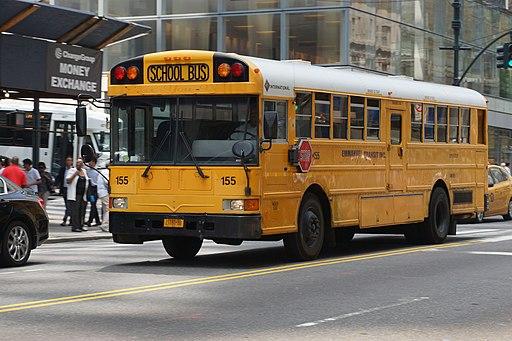
(Source:Wikimedia Commons [https://commons.wikimedia.org/)]

# Digging into Data after Joining Flatiron
***

Now before I start exploring data, I look at:
* How clean is it?
* How was it collected?
* What license is it available under?

I have learned that importing libraries and visualization packages allows me to be more effective in crafting insights, because my code can access other tools, projects become both more manageable and more impactful. 

My favorite libraries and visualization packages so far include: 
* <code> sqlite3 </code>: a library that allows accessing and manipulating databases
* <code> pandas </code>: a data analysis and manipulation library that allows flexible reshaping of dataframes
* <code> seaborn </code>: a data visualization library based on matplot lib

Right now, I am looking at data from: 

* [The New York State Education Department](https://data.nysed.gov/)

* [NYC Open Data](https://data.cityofnewyork.us/Education/2005-2015-Graduation-Outcomes/qk7d-gecv)

So I will import a set of libraries to explore this data:

# Data Understanding

For over two decades, the New York State Performance Standards Consortium has focused on in-depth literacy, problem solving, research and methodolgy as a more holistic representation of student performance.  The consortium serves around 12,000 students in New York State and has a waiver from the majority of Regents exams.  Within this project, I will analyze the graduation outcomes for subgroups students in Consortium Schools and compare those outcomes to New York City Public Schools according to data hosted by the NYSED and on NYC Open Data.

The main questions I asked were:

- Are there any significant differences in graduation rates among different subgroups?
- Which subgroup has the highest percentage of students earning a regents diploma with advanced designation? 
    - Overall in NYC
    - Within a School
    - Across the Consortium
- What is the percentage of students who are still enrolled in school across different subgroups? 

# Importing appropriate libraries and visualization packages 

Building code that is modular and easy to use depends on being able to leverage libraries and visualization packages to access useful code in a way that is efficient and easily reproducible.  In particular the folowing libaries:
* <code> pandas </code>               &rarr;  data manipulation and analysis, providing data structures and functions to  work with structured data, like tables and time series
* <code> numpy </code>                &rarr; creating and manipulating data structures and functions for working with large multi-dimensional arrays and matrices
* <code> seaborn </code>              &rarr;  data visualization(built on top of Matplotlib), which is used for creating statistical graphics.
* <code> matplotlib </code>           &rarr; creation of various types of plots and graphs

In [18]:
# Import libraries and visualization packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
# Allow plots to display and be stored inline within a notebook
%matplotlib inline

# Set display option to readable format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Exploring Data

In [19]:
# Read Tables from the NYSED Website
overall_nyc_df= pd.read_html('https://data.nysed.gov/gradrate.php?instid=7889678368&year=2021&cohortgroup=1')


# Manhattan Schools
beacon_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046819&year=2021&cohortgroup=1')
eastside_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046774&year=2021&cohortgroup=1')
essex_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000058023&year=2021&cohortgroup=1')
facing_history_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000059107&year=2021&cohortgroup=1')
harvest_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000075017&year=2021&cohortgroup=1')
humanities_prep_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046729&year=2021&cohortgroup=1')
ice_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046782&year=2021&cohortgroup=1')
landmark_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046830&year=2021&cohortgroup=1')
manhattan_international_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046817&year=2021&cohortgroup=1')
sof_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000048361&year=2021&cohortgroup=1')
vhs_df = pd.read_html('https://data.nysed.gov/gradrate.php?instid=800000046816&year=2021&cohortgroup=1')

In [20]:
# Write Data to csv files
overall_nyc = overall_nyc_df[0].to_csv('overall_nyc_from_nysed.csv')
beacon = beacon_df[0].to_csv('beacon.csv')
eastside = eastside_df[0].to_csv('eastside.csv')
essex = essex_df[0].to_csv('essex.csv')
facing_history = facing_history_df[0].to_csv('facing_history.csv')
harvest = harvest_df[0].to_csv('harvest.csv')
humanities_prep = humanities_prep_df[0].to_csv('humanities_prep.csv') 
ice = ice_df[0].to_csv('ice.csv')
landmark = landmark_df[0].to_csv('landmark.csv')
mihs = manhattan_international_df[0].to_csv('mihs.csv')
sof = sof_df[0].to_csv('sof.csv')
vhs = vhs_df[0].to_csv('vhs.csv')

In [21]:
# Read in the data
# Read Data from NYSED
# df= pd.read_csv('school_name.csv')

overall_nyc = pd.read_csv('overall_nyc_from_nysed.csv')
beacon = pd.read_csv('beacon.csv')
eastside = pd.read_csv('eastside.csv')
essex = pd.read_csv('essex.csv')
facing_history = pd.read_csv('facing_history.csv')
harvest = pd.read_csv('harvest.csv')
humanities_prep = pd.read_csv('humanities_prep.csv')
ice = pd.read_csv('ice.csv')
landmark = pd.read_csv('landmark.csv')
mihs = pd.read_csv('mihs.csv')
sof = pd.read_csv('sof.csv')
vhs = pd.read_csv('vhs.csv')

In [22]:
def plot_bar(df, population, lim):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    population : string
    lim: max value of graduation rate 
    
    
    Output: 
    -
    bar plot
    """
    # Initialize data
    
    values = df.GRAD_PERCENTAGE
    labels = df.Subgroup
    xlabel = "Graduation Rate (%)"
    ylabel = "Population"
    title = "Graduation Rate by Subgroup for " + population + " As of June 2021"
    # Set plot parameters
    plt.figure(figsize = (15,12))

    clrs = ['grey' if (x != max(values)) else 'blue' for x in values]
    # Plot histogram
    ax = sns.barplot(x = values, y = labels, palette = clrs)
    sns.set_theme(style="darkgrid", palette="Set2")
 #   plt.style.use('fivethirtyeight')
    #Customize title and axes labels
    ax.set_xlabel(xlabel, fontsize = '16', weight = 'bold');
    ax.set_ylabel(ylabel, fontsize = '16', weight = 'bold')
    ax.set_title(title, weight = 'bold').set_fontsize('20');
    # We change the fontsize of minor ticks label 
#    ax.tick_params(axis='both', which='major', labelsize = 14)
    sns.set(font_scale = 1.75)
    # Highlight bars that exceed the min value in skyblue and those that do not in salmon
    for bar in ax.patches:
        if bar.get_width() < lim:
            bar.set_color('grey')
        else:
            bar.set_color('blue')                

In [23]:
def summarize_dataframe(df):
    """
    Summarizes each column in a Pandas dataframe, where each row of the 
    summary output is a column of the input dataframe, df
    Will show the datatype of data in the column, the number of missing values
    in that column, and the number of unique values in the column
    -
    Input:
    df : Pandas dataframe
    -
    Output:
    summary : Pandas dataframe, now showing column details
    """
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index'] # name of each variable 
    summary = summary[['Name','dtypes']] # data type of each variable
    summary['Missing'] = df.isnull().sum().values # number of missing values  
    summary['Uniques'] = df.nunique().values # number of unique values
    return summary 

In [24]:
def format_df(df):
    """
    Plot bar graph of genre vs ww profit by month
    
    Inputs:
    -
    df: pandas dataframe
    
    
    Output: 
    -
    df_info: pandas dataframe information
    df_head: first 24 rows of pandas dataframe
    """
    
    df = pd.DataFrame(df)
    df.rename(columns={'Unnamed: 0': 'index', 'Subgroup': 'Subgroup','Total': "ALL_STUDENTS",
                       'GRAD RATE' : 'GRAD_RATE', 'GRAD RATE.1' :'GRAD_PERCENTAGE',
                      'REGENTS WITH ADVANCED DESIGNATION' : 'REGENTS_WITH_ADVANCED_DESIGNATION' 
                       ,'REGENTS WITH ADVANCED DESIGNATION.1' : 'REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE' ,
                       'REGENTS DIPLOMA' : 'REGENTS_DIPLOMA', 'REGENTS DIPLOMA.1' : 'REGENTS_DIPLOMA_PERCENTAGE',
                      'LOCAL DIPLOMA' : 'LOCAL_DIPLOMA', 'LOCAL DIPLOMA.1' : 'LOCAL_DIPLOMA_PERCENTAGE', 
                       'NON DIPLOMA CRED': 'NON_DIPLOMA_CRED', 'NON DIPLOMA CRED.1' : 'NON_DIPLOMA_CRED_PERCENTAGE',
                      'STILL ENROLLED' : 'STILL_ENROLLED', 'STILL ENROLLED.1': 'STILL_ENROLLED_PERCENTAGE',
                      'GED TRANSFER': 'GED_TRANSFER', 'GED TRANSFER.1' :'GED_TRANSFER_PERCENTAGE', 
                      'DROPOUT' :'DROPOUT', 'DROPOUT.1': 'DROPOUT_PERCENTAGE'}, inplace=True)
    
    for col in df.columns:
        print(col)
    df = df.replace({"—":"0"}, regex = True)
    df = df.replace({"\%":""}, regex = True)
    df.drop(0, inplace = True)
    df.drop(labels = "index", axis = 1, inplace = True)
    df = df.astype({col: int for col in df.columns[1:]})

  #  df_info = df.info()
  #  df_head = df.head(24)
    
  #  return df_head
    return df

In [25]:
def explore_df(df, school_name, grad_rate_comp_type):
    """
    This function explores a dataframe and generates 
    a graph and a summary of the dataframe
    
    Inputs
    --
    df: pandas dataframe
    
    Outputs
    --
    bargraph
    summary_df : summary of data frame 
    """
    if grad_rate_comp_type == "state":
        grad_rate = 85;
    if grad_rate_comp_type == "city":
        grad_rate = 79;
    else:
        print("Please enter either city or state")
    formatted_df = format_df(df)
    summary_df = summarize_dataframe(formatted_df)
    plot = plot_bar(formatted_df, school_name, grad_rate)
    
    return formatted_df
    return summary_df
    return plot

index
Subgroup
ALL_STUDENTS
GRAD_RATE
GRAD_PERCENTAGE
REGENTS_WITH_ADVANCED_DESIGNATION
REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE
REGENTS_DIPLOMA
REGENTS_DIPLOMA_PERCENTAGE
LOCAL_DIPLOMA
LOCAL_DIPLOMA_PERCENTAGE
NON_DIPLOMA_CRED
NON_DIPLOMA_CRED_PERCENTAGE
STILL_ENROLLED
STILL_ENROLLED_PERCENTAGE
GED_TRANSFER
GED_TRANSFER_PERCENTAGE
DROPOUT
DROPOUT_PERCENTAGE


,Subgroup,ALL_STUDENTS,GRAD_RATE,GRAD_PERCENTAGE,REGENTS_WITH_ADVANCED_DESIGNATION,REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE,REGENTS_DIPLOMA,REGENTS_DIPLOMA_PERCENTAGE,LOCAL_DIPLOMA,LOCAL_DIPLOMA_PERCENTAGE,NON_DIPLOMA_CRED,NON_DIPLOMA_CRED_PERCENTAGE,STILL_ENROLLED,STILL_ENROLLED_PERCENTAGE,GED_TRANSFER,GED_TRANSFER_PERCENTAGE,DROPOUT,DROPOUT_PERCENTAGE
1,All Students,80294,62636,78,27739,35,34114,42,783,1,235,0,13020,16,603,1,3751,5
2,Female,38739,32341,83,15447,40,16523,43,371,1,91,0,4831,12,225,1,1242,3
3,Male,41555,30295,73,12292,30,17591,42,412,1,144,0,8189,20,378,1,2509,6
4,General Education Students,62760,53154,85,26261,42,26698,43,195,0,4,0,6642,11,395,1,2550,4
5,Students with Disabilities,17534,9482,54,1478,8,7416,42,588,3,231,1,6378,36,208,1,1201,7
6,American Indian or Alaska Native,913,707,77,280,31,414,45,13,1,0,0,150,16,14,2,42,5
7,Asian or Native Hawaiian/Other Pacific Islander,13154,11658,89,8156,62,3484,26,18,0,14,0,1074,8,54,0,352,3
8,Black or African American,20655,15556,75,4389,21,10966,53,201,1,75,0,3786,18,195,1,1017,5
9,Hispanic or Latino,31662,23656,75,8799,28,14627,46,230,1,115,0,5549,18,294,1,2029,6
10,White,12486,9906,79,5593,45,4065,33,248,2,28,0,2218,18,44,0,288,2


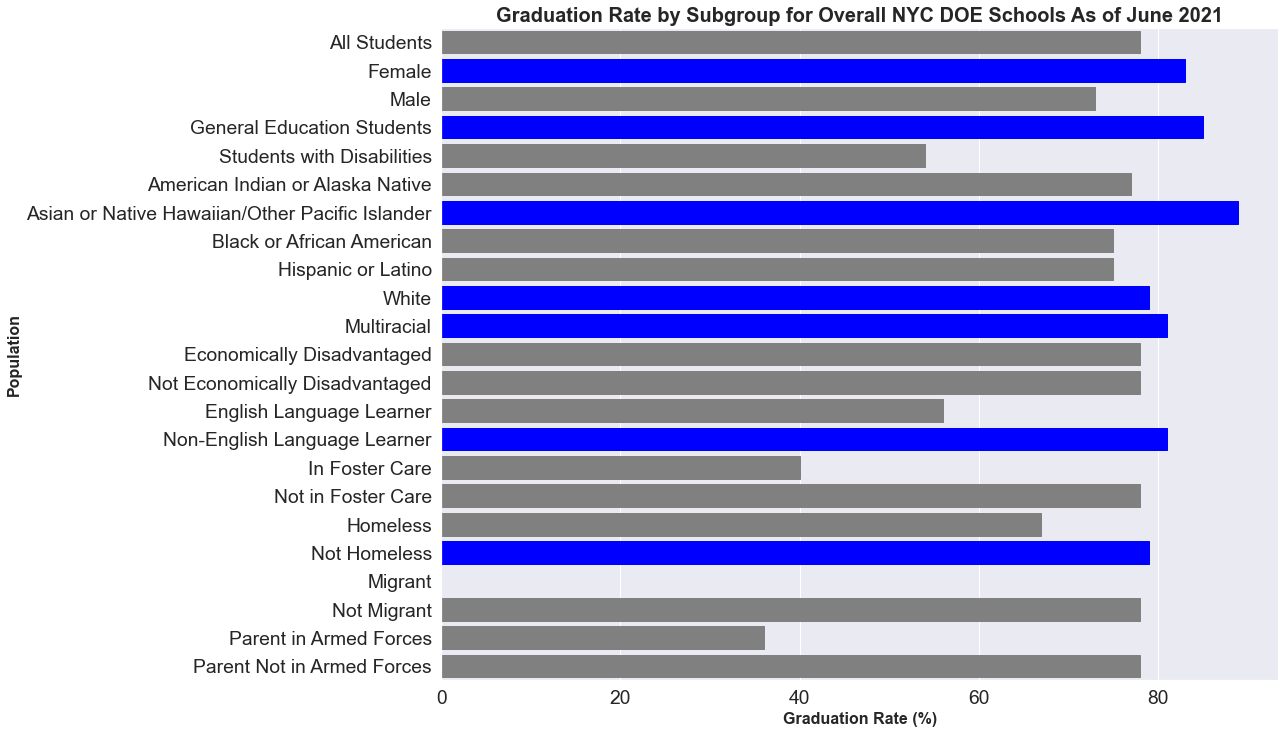

In [26]:
explore_df(overall_nyc, "Overall NYC DOE Schools", "city")

In [31]:
overall_nyc = overall_nyc.iloc[1:]

In [70]:
# Assuming the dataframe is stored in a variable called 'df'
# Extract the relevant columns for subgroup and graduation rate
subgroup_column = 'Subgroup'
grad_rate_column = 'GRAD_RATE'

# Filter out the 'All Students' subgroup since it represents the overall graduation rate
subgroup_data = overall_nyc[overall_nyc[subgroup_column] != 'All Students']

# Get unique subgroups in the dataset
subgroups = subgroup_data[subgroup_column].unique()

# List to store the significant differences
significant_differences = []
subgroup_rates = []
# Perform pairwise t-tests between each subgroup and the 'All Students' subgroup
for subgroup in subgroups:
    subgroup_rate = subgroup_data[subgroup_data[subgroup_column] == subgroup][grad_rate_column]
    subgroup_rates.append(subgroup_rate)
    display(subgroup_rates)
    all_students_rate = overall_nyc[overall_nyc[subgroup_column] == 'All Students'][grad_rate_column]
    all_students_rate = pd.to_numeric(all_students_rate)
    display(all_students_rate)

    # Check for missing or invalid values
    if subgroup_rate.isnull().any() or all_students_rate.isnull().any():
        print("subgroup rate is not null")
        continue

    # Calculate the subgroup rate relative to all students rate
    subgroup_rate = subgroup_rate / all_students_rate

    # Perform t-test only if there are valid values
    if np.isfinite(subgroup_rate).all():
        t_statistic, p_value = stats.ttest_ind(subgroup_rate, all_students_rate, equal_var=False)

        if np.isfinite(p_value) and p_value < 0.05:
            significant_differences.append(subgroup)

# Print the subgroups with significant differences
if len(significant_differences) > 0:
    print("Significant differences in graduation rates found for the following subgroups:")
    for subgroup in significant_differences:
        print(subgroup)
else:
    print("No significant differences in graduation rates found among subgroups.")

[2    32341
 Name: GRAD_RATE, dtype: object]

1    62636
Name: GRAD_RATE, dtype: int64

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [97]:
# Assuming the dataframe is stored in a variable called 'df'
subgroup_column = 'Subgroup'
grad_rate_column = 'GRAD_RATE'

# Filter out the 'All Students' subgroup since it represents the overall graduation rate
subgroup_data = overall_nyc[overall_nyc[subgroup_column] != 'All Students'][0:]
display(subgroup_data)
# Get the graduation rate of all students
all_students_rate = overall_nyc[overall_nyc[subgroup_column] == 'All Students']

# Compare the graduation rate of each subgroup to the graduation rate of all students
subgroup_data['Rate_Comparison'] = subgroup_data[grad_rate_column] - all_students_rate

# Display the results
print(subgroup_data[['Subgroup', grad_rate_column, 'Rate_Comparison']])

,index,Subgroup,ALL_STUDENTS,GRAD_RATE,GRAD_PERCENTAGE,REGENTS_WITH_ADVANCED_DESIGNATION,REGENTS_WITH_ADVANCED_DESIGNATION_PERCENTAGE,REGENTS_DIPLOMA,REGENTS_DIPLOMA_PERCENTAGE,LOCAL_DIPLOMA,LOCAL_DIPLOMA_PERCENTAGE,NON_DIPLOMA_CRED,NON_DIPLOMA_CRED_PERCENTAGE,STILL_ENROLLED,STILL_ENROLLED_PERCENTAGE,GED_TRANSFER,GED_TRANSFER_PERCENTAGE,DROPOUT,DROPOUT_PERCENTAGE
2,1.00,Female,38739,32341,83%,15447,40%,16523,43%,371,1%,91,0%,4831,12%,225,1%,1242,3%
3,2.00,Male,41555,30295,73%,12292,30%,17591,42%,412,1%,144,0%,8189,20%,378,1%,2509,6%
4,3.00,General Education Students,62760,53154,85%,26261,42%,26698,43%,195,0%,4,0%,6642,11%,395,1%,2550,4%
5,4.00,Students with Disabilities,17534,9482,54%,1478,8%,7416,42%,588,3%,231,1%,6378,36%,208,1%,1201,7%
6,5.00,American Indian or Alaska Native,913,707,77%,280,31%,414,45%,13,1%,0,0%,150,16%,14,2%,42,5%
7,6.00,Asian or Native Hawaiian/Other Pacific Islander,13154,11658,89%,8156,62%,3484,26%,18,0%,14,0%,1074,8%,54,0%,352,3%
8,7.00,Black or African American,20655,15556,75%,4389,21%,10966,53%,201,1%,75,0%,3786,18%,195,1%,1017,5%
9,8.00,Hispanic or Latino,31662,23656,75%,8799,28%,14627,46%,230,1%,115,0%,5549,18%,294,1%,2029,6%
10,9.00,White,12486,9906,79%,5593,45%,4065,33%,248,2%,28,0%,2218,18%,44,0%,288,2%
11,10.00,Multiracial,1424,1153,81%,522,37%,558,39%,73,5%,3,0%,243,17%,2,0%,23,2%


ValueError: Wrong number of items passed 41, placement implies 1

In [105]:
# Assuming the dataframe is stored in a variable called 'df'
overall_students_percentage = overall_nyc.loc[overall_nyc['Subgroup'] == 'All Students', 'GRAD_PERCENTAGE'].values[0]

# Iterate through each subgroup and compare their graduation percentage to the overall percentage
for index, row in overall_nyc.iterrows():
    subgroup = row['Subgroup']
    subgroup_percentage = row['GRAD_PERCENTAGE']
    
    if subgroup != 'All Students':
        if subgroup_percentage > overall_students_percentage:
            print(f"The graduation percentage of the {subgroup} subgroup is higher than the overall percentage of students graduating from NYC public high schools.")
        elif subgroup_percentage < overall_students_percentage:
            print(f"The graduation percentage of the {subgroup} subgroup is lower than the overall percentage of students graduating from NYC public high schools.")
        else:
            print(f"The graduation percentage of the {subgroup} subgroup is equal to the overall percentage of students graduating from NYC public high schools.")

The graduation percentage of the Female subgroup is higher than the overall percentage.
The graduation percentage of the Male subgroup is lower than the overall percentage.
The graduation percentage of the General Education Students subgroup is higher than the overall percentage.
The graduation percentage of the Students with Disabilities subgroup is lower than the overall percentage.
The graduation percentage of the American Indian or Alaska Native subgroup is lower than the overall percentage.
The graduation percentage of the Asian or Native Hawaiian/Other Pacific Islander subgroup is higher than the overall percentage.
The graduation percentage of the Black or African American subgroup is lower than the overall percentage.
The graduation percentage of the Hispanic or Latino subgroup is lower than the overall percentage.
The graduation percentage of the White subgroup is higher than the overall percentage.
The graduation percentage of the Multiracial subgroup is higher than the overa

In [ ]:
explore_df(essex, "Essex Street Academy High School", "city")

In [ ]:
explore_df(beacon, "Beacon High School", "city")

In [ ]:
explore_df(facing_history, "Facing History High School", "city")

In [ ]:
explore_df(harvest, "Harvest Collegiate High School", "city")

In [ ]:
explore_df(humanities_prep, "Humanities Prepatory Academy High School", "city")

In [ ]:
explore_df(ice, "Institute for Collaborative Education High School", "city")

In [ ]:
explore_df(landmark, "Landmark High School", "city")

In [ ]:
explore_df(mihs, "Manhattan International High School", "city")

In [ ]:
explore_df(sof, "School of the Future High School", "city")

In [ ]:
explore_df(vhs, "Vanguard High School", "city")

In [ ]:
import ipywidgets as widgets

In [ ]:
widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)

In [ ]:
from IPython.display import display

In [ ]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
display(slider)

In [ ]:
slider = widgets.IntSlider(
    min=2016,
    max=2021,
    step=1,
    description='Year:',
    value=2017
)
text = widgets.IntText()
display(slider, text)
widgets.jslink((slider, 'value'), (text, 'value'))

In [ ]:
btn = widgets.Button(description='NYSED')
display(btn)
def btn_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(btn_eventhandler)

In [ ]:
checkbox = widgets.Checkbox(
           description='Check to invert',)

In [ ]:
display(checkbox)

In [ ]:
sof_subset = sof.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_PERCENTAGE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
sof_subset.head()

#new_df = df.loc[:, ["director","column1", "column2",  "column3",..., "columnn"]]

In [ ]:
overall_nyc_subset = overall_nyc.loc[1:,["Subgroup", "ALL_STUDENTS", "GRAD_PERCENTAGE", "REGENTS_DIPLOMA_PERCENTAGE",
                            "DROPOUT_PERCENTAGE"]]
overall_nyc_subset.head(23)

In [ ]:
def remove_special_chars_df(df):
    for col in df.columns:
        print(col)
    df = df.replace({"\%":""}, regex = True)
    df = df.replace({"—": 0}, regex = True)
    df = df.astype({col: int for col in df.columns[1:]})
    return df


In [ ]:
overall_nyc_subset = remove_special_chars_df(overall_nyc_subset);

In [ ]:
overall_nyc_subset["Population"] = "CITYWIDE"

In [ ]:
overall_nyc_subset

In [ ]:
sof_subset = remove_special_chars_df(sof_subset);

In [ ]:
sof_subset["Population"] = "SOF"
sof_subset

In [ ]:
#grouped = df.groupby(['Population', 'Subgroup'])['GRAD_PERCENTAGE']
grouped_sof = sof_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [ ]:
grouped_sof

In [ ]:
grouped_nyc_overall = overall_nyc_subset.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()

In [ ]:
grouped_nyc_overall

In [ ]:
#merged_df = pd.merge(left = df1, right = df2, left_on = ["primary_key"], 
#                          right_on = ["primary_key"], how = "inner")
#merged_df.head()



In [ ]:
#pd.concat([df1, df2])
test = pd.concat([grouped_nyc_overall, grouped_sof])

In [ ]:
test2 = pd.concat([sof_subset, overall_nyc_subset])
test2

In [ ]:
test3 = test2.groupby(['Population', "Subgroup"])['GRAD_PERCENTAGE'].max()
test3 = pd.DataFrame(test3)
test3

In [ ]:
test = pd.DataFrame(test)
test

In [ ]:
test.reset_index

In [ ]:
test.columns

In [ ]:
test.transpose()
test.columns

In [ ]:
plot_bar(test2, "city", 84)

In [ ]:
retention = pd.read_excel('Data/College-Retention-by-Entering-Cohort.xlsx')

In [ ]:
retention.head(52)

In [ ]:
retention_year = pd.read_excel('Data/Retention-by-cohort-year.xlsx')
retention_year

In [ ]:
retention_year.info()

In [ ]:
retention_year = pd.DataFrame(retention_year)

In [ ]:
retention_year['Year'] = retention_year['Year'].astype(str)
retention_year['Retention Rate (%)'] = retention_year['Retention Rate']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
retention_year.info()

In [ ]:
import plotly.express as px

In [ ]:
def retention_plot (dataset):
    fig = px.choropleth(dataset, 
                      locations="State Symbol",
                      locationmode="USA-states", 
                      color='Retention Rate', # set the choropleth data to plot
                      hover_name='State Name', # column to add to hover information
                      hover_data = ['Retention Rate'], # data to be displayed when mousing over the map
                      color_continuous_scale="spectral", 
                      scope="usa", 
                      animation_frame = 'Year'
                      )
  

  # set your chart_studio username and api key
  # how to -> https://plotly.com/python/getting-started-with-chart-studio/
    return fig

In [ ]:
retention_plot(retention_year)